# Simple Linear Regression
* In this lab we will use simple linear regression to predict the car price.
* Objective
  * To know if the dealer is offering fair value for my trade-in.
  * To know if I put a fair value on my car.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("automobileEDA.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
df.shape

(201, 29)

In [4]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [6]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [7]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [8]:
df.describe(include="object")

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [9]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [10]:
df["price"]

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 201, dtype: float64

# We will use dataset of Car price prediction hosted on IBM Cloud object.

In [23]:
import os # file path
import numpy as np # statistical data 
import pandas as pd # data analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visuslization
from sklearn.model_selection import train_test_split # to split data in training and testing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
df_auto = pd.read_csv("automobileEDA.csv")
df_auto.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [19]:
X = df_auto.drop("price", axis=1) # independent features
Y = df_auto['price'] # dependent features

# Train Test Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [29]:
X_test

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,horsepower-binned,diesel,gas
97,0,106,nissan,std,four,sedan,fwd,front,97.2,0.833253,...,3.47,8.5,97.0,5200.0,27,34,8.703704,Low,0,1
117,1,154,plymouth,std,four,hatchback,fwd,front,93.7,0.755887,...,3.23,9.4,68.0,5500.0,31,38,7.580645,Low,0,1
59,0,115,mazda,std,four,sedan,fwd,front,98.8,0.854397,...,3.39,8.6,84.0,4800.0,26,32,9.038462,Low,0,1
35,0,78,honda,std,four,wagon,fwd,front,96.5,0.754926,...,3.41,9.2,76.0,6000.0,30,34,7.833333,Low,0,1
165,2,134,toyota,std,two,hatchback,rwd,front,98.4,0.846708,...,3.50,9.3,116.0,4800.0,24,30,9.791667,Medium,0,1
147,1,87,toyota,std,two,hatchback,fwd,front,95.7,0.762614,...,3.03,9.0,62.0,4800.0,31,38,7.580645,Low,0,1
28,3,145,dodge,turbo,two,hatchback,fwd,front,95.9,0.832292,...,3.90,7.0,145.0,5000.0,19,24,12.368421,Medium,0,1
78,3,153,mitsubishi,std,two,hatchback,fwd,front,96.3,0.831331,...,3.46,8.5,88.0,5000.0,25,32,9.400000,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115.0,5500.0,18,22,13.055556,Medium,0,1
18,1,98,chevrolet,std,two,hatchback,fwd,front,94.5,0.749159,...,3.11,9.6,70.0,5400.0,38,43,6.184211,Low,0,1


# Simple Linear Regression
**Predict Car Price using "highway-mph"**

In [52]:
X_train_simple = X_train["highway-mpg"].values.reshape(-1, 1)
X_test_simple = X_test["highway-mpg"].values.reshape(-1, 1)
# X_train_simple, X_train_simple.shape

In [38]:
# X_test_simple

In [53]:
simple_lm = LinearRegression()
simple_lm.fit(X_train_simple, y_train)

LinearRegression()

In [54]:
y_hat_simple = simple_lm.predict(X_test_simple)
y_hat_simple[:5]

array([10530.19044542,  7150.17926639, 12220.19603494, 10530.19044542,
       13910.20162445])

In [62]:
c = simple_lm.intercept_ 

In [61]:
m = simple_lm.coef_.item()

In [68]:
price = c + m * df["highway-mpg"]
price

0      16445.210009
1      16445.210009
2      17290.212803
3      13910.201624
4      20670.223983
           ...     
196    15600.207214
197    18135.215598
198    19825.221188
199    16445.210009
200    18135.215598
Name: highway-mpg, Length: 201, dtype: float64

# Exercise
    * Fit Simple Linear Regression with engine-size as independent variable to predict car price.
    * Fit simple linear regression with horsepower as independent variable to predict car price.

In [71]:
X_simple_train = X_train["engine-size"].values.reshape(-1, 1)
X_simple_test = X_test["engine-size"].values.reshape(-1, 1)

In [72]:
model = LinearRegression()
model.fit(X_simple_train, y_train)

LinearRegression()

In [76]:
y_pred = model.predict(X_simple_test)
y_pred[:5]

array([12200.90004806,  7203.38742473, 12534.06755628,  7536.55493295,
       16532.07765495])

In [81]:
m = model.coef_.item()
m

166.58375411113175

In [83]:
c = model.intercept_
c

-7789.150445273459

In [87]:
price = c + m * df["engine-size"]
price

0      13866.737589
1      13866.737589
2      17531.580180
3      10368.478753
4      14866.240114
           ...     
196    15699.158884
197    15699.158884
198    21029.839016
199    16365.493901
200    15699.158884
Name: engine-size, Length: 201, dtype: float64

# Horsepower as independent variable

In [92]:
# Training Testing data in 2D format
X_simple_train = X_train["horsepower"].values.reshape(-1, 1)
X_simple_test = X_test["horsepower"].values.reshape(-1, 1)

# model

In [95]:
model = LinearRegression()
model.fit(X_simple_train, y_train)

LinearRegression()

In [97]:
y_pred = model.predict(X_simple_test)
y_pred[:5]

array([12166.10030237,  7173.74640389,  9928.14855478,  8550.94747933,
       15436.95285656])

In [99]:
m = model.coef_.item()
m

172.15013443062284

In [100]:
c = model.intercept_
c

-4532.462737395461

In [102]:
price = m * df["horsepower"] + c
price

0      14576.202184
1      14576.202184
2      21978.657965
3      13026.850975
4      15264.802722
           ...     
196    15092.652588
197    23011.558772
198    18535.655276
199    13715.451512
200    15092.652588
Name: horsepower, Length: 201, dtype: float64

<Axes: ylabel='horsepower'>

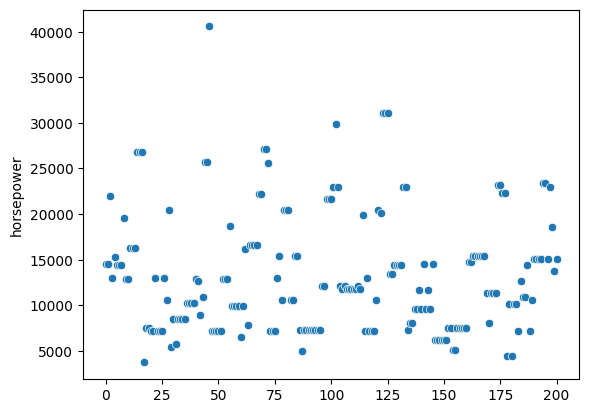

In [103]:
sns.scatterplot(price)